# Assignment - Advanced Regression

## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. <br/>
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house.

Below are the steps followed:
    
* Step 1: Importing, reading and understanding the data
* Step 2: Data cleaning 
* Step 3: Analyzing the predictor variables with the response variable (univariate and bivariate)
* Step 4: Recursive Feature Elimination (RFE)
* Step 5: Ridge and Lasso Regression

## Step 1: Importing, reading and understanding the data

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Getting rid of any warning messages

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the data set

house_data = pd.read_csv('train.csv', encoding = 'latin')
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Data exploration
# Statistical information of the dataset

house_data.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [4]:
# Shape of the dataset (number of rows and columns)

house_data.shape

(1460, 81)

In [5]:
# Dataset summary

house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Number of columns: 81

In [6]:
# Stripping off the white spaces

house_data = house_data.rename (columns = lambda x: x.strip(), inplace = False)

In [7]:
# Check and drop any duplicated records

house_data = house_data.drop_duplicates()

In [8]:
# We can check the count of certain variables by using the function value.counts()

# Variable: Alley
house_data.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [9]:
# Variable: Pool quality

house_data.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [10]:
# Variable: Utilities

house_data.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [11]:
# Variable: Street

house_data.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

## Step 2: Data cleaning

In [12]:
# Viewing the null values

house_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [13]:
# Check and drop variables with highest percentage of null values
# Rate of proportion/percent of null values in each variable

df_missing = pd.DataFrame((round (100* (house_data.isnull().sum() / len(house_data.index)), 2)), columns = ['Missing'])
df_missing.sort_values(by = ['Missing'], ascending = False).head(20)

,Missing
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


Variable 'pool quality' has the highest number of null values and 'electrical' being the least (excluding 'Id')

In [14]:
# Replacing all the null values to values according to the original variable name

house_data['PoolQC'] = house_data['PoolQC'].fillna('No_Pool')
house_data['MiscFeature'] = house_data['MiscFeature'].fillna('None')
house_data['Alley'] = house_data['Alley'].fillna('No_Alley_Access')
house_data['Fence'] = house_data['Fence'].fillna('No_Fence')
house_data['FireplaceQu'] = house_data['FireplaceQu'].fillna('No_Fireplace')
house_data['GarageYrBlt'] = house_data['GarageYrBlt'].fillna(0)
house_data['MasVnrType'] = house_data['MasVnrType'].fillna('None')
house_data['MasVnrArea'] = house_data['MasVnrArea'].fillna(0)
house_data['MasVnrArea'] = house_data['MasVnrArea'].fillna(0)
house_data['Electrical'] = house_data['Electrical'].fillna("Other")

In [15]:
# Let's view a summary of the dataset after making a few changes to it

house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No_Alley_Access,Reg,Lvl,AllPub,...,0,No_Pool,No_Fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No_Alley_Access,Reg,Lvl,AllPub,...,0,No_Pool,No_Fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No_Alley_Access,IR1,Lvl,AllPub,...,0,No_Pool,No_Fence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No_Alley_Access,IR1,Lvl,AllPub,...,0,No_Pool,No_Fence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No_Alley_Access,IR1,Lvl,AllPub,...,0,No_Pool,No_Fence,None,0,12,2008,WD,Normal,250000


In [16]:
# Replacing the null values with "No garage" on all 'garage' related columns

for col in ('GarageType', 'GarageQual', 'GarageFinish', 'GarageCond'): house_data[col] = house_data[col].fillna('No_Garage')

<AxesSubplot:xlabel='GarageCond', ylabel='count'>

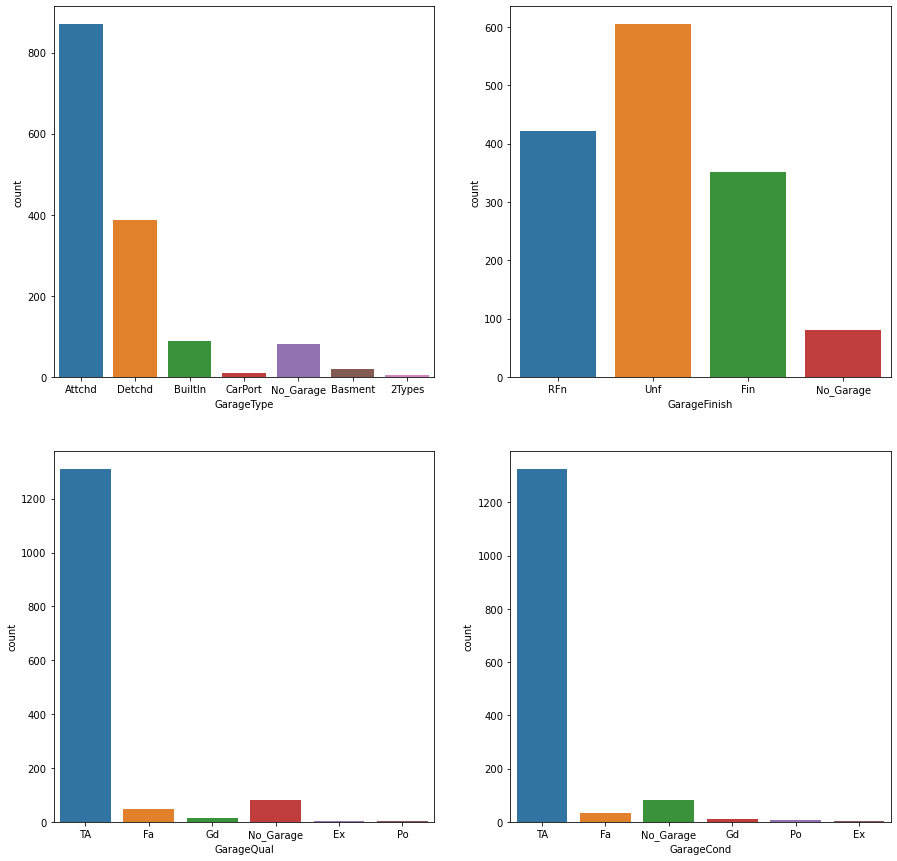

In [17]:
# Plotting count plots for each garage related variable

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.countplot(house_data["GarageType"])
plt.subplot(2,2,2)
sns.countplot(house_data["GarageFinish"])
plt.subplot(2,2,3)
sns.countplot(house_data["GarageQual"])
plt.subplot(2,2,4)
sns.countplot(house_data["GarageCond"])

In [18]:
# Replacing the null values with "No basement" on all 'basement' related columns

for col in ('BsmtFinType1', 'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond'): house_data[col] = house_data[col].fillna('No_Basement')

<AxesSubplot:xlabel='BsmtFinType2', ylabel='count'>

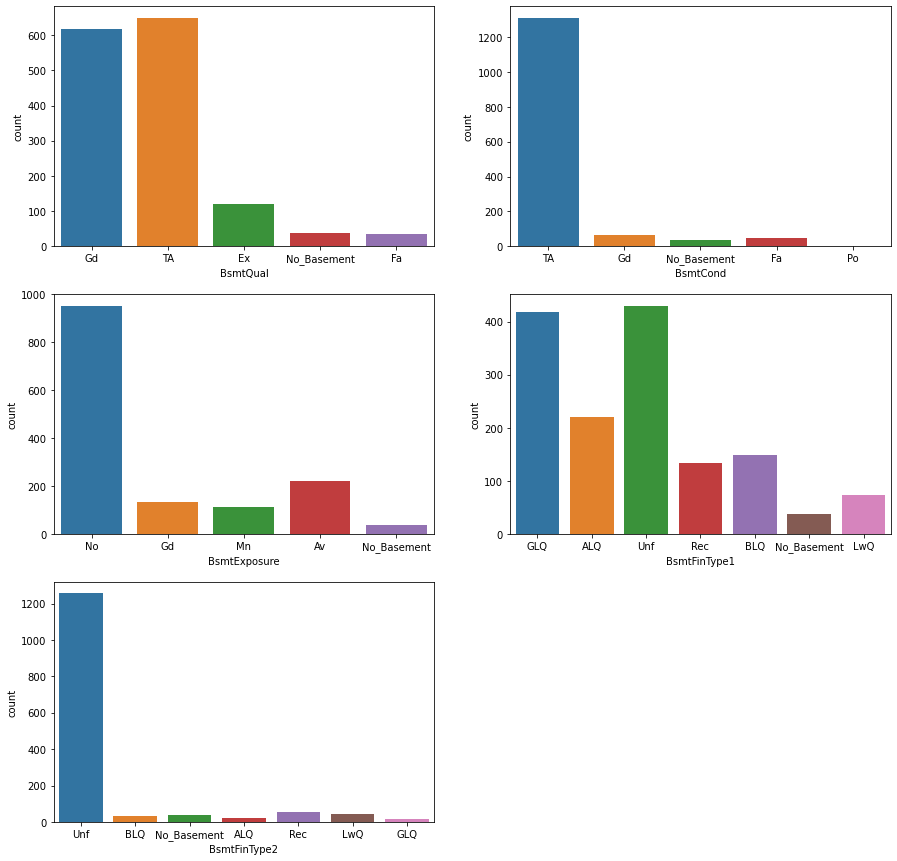

In [19]:
# Plotting count plots for each basement related variable

plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
sns.countplot(house_data["BsmtQual"])
plt.subplot(3,2,2)
sns.countplot(house_data["BsmtCond"])
plt.subplot(3,2,3)
sns.countplot(house_data["BsmtExposure"])
plt.subplot(3,2,4)
sns.countplot(house_data["BsmtFinType1"])
plt.subplot(3,2,5)
sns.countplot(house_data["BsmtFinType2"])

In [20]:
# Dropping the column: LotFontgage as it has multiple null values

house_data.drop("LotFrontage", axis = 1, inplace = True)

In [21]:
# Dataset summary

house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Number of columns after dropping a variable: 80

In [22]:
# Converting the column 'GarageYrBlt' to vector within the dataframe

house_data['GarageYrBlt'] = house_data['GarageYrBlt'].astype(int)

### Step 3: Analyzing the predictor variables with the response variable (univariate and bivariate)

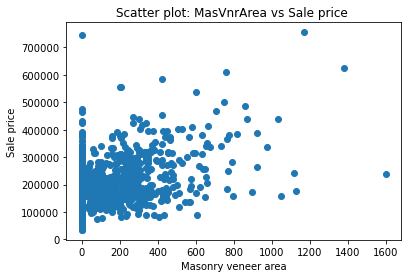

In [23]:
# Scatter plot for Masonry veneer area in square feet vs Sale price

plt.scatter(house_data.MasVnrArea, house_data.SalePrice)
plt.title("Scatter plot: MasVnrArea vs Sale price ")
plt.xlabel("Masonry veneer area")
plt.ylabel("Sale price")
plt.show()

<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

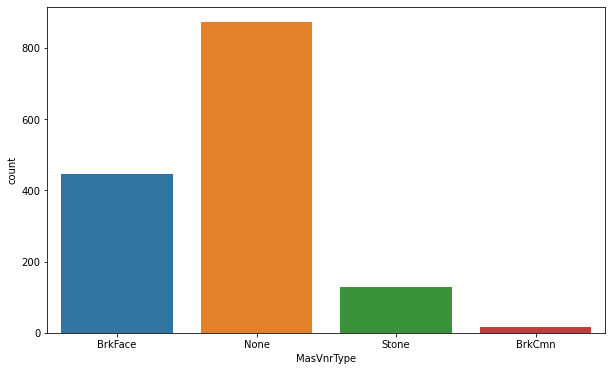

In [24]:
# Plotting count plots masonry veneer area variable

plt.figure(figsize = (10,6))
sns.countplot(house_data["MasVnrType"])

Text(0.5, 1.0, 'Sale Price ')

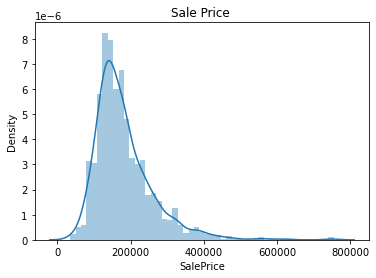

In [25]:
# Distplot for sale price vs density

sns.distplot(house_data['SalePrice']).set_title('Sale Price ')

Text(0.5, 1.0, 'Masonry Veneer Area vs Density')

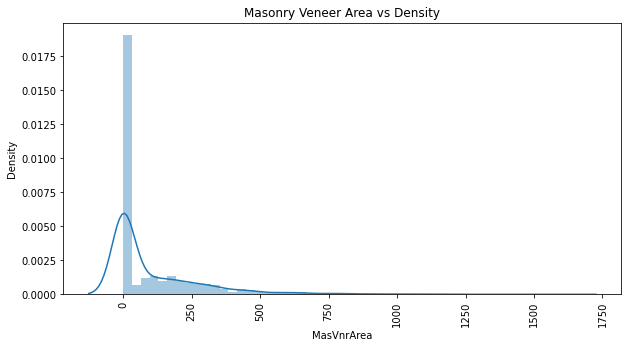

In [26]:
# Distplot on Masonry veneer area vs density

plt.figure(figsize = (10, 5))
sns.distplot(house_data['MasVnrArea']).tick_params(axis = 'x', rotation = 90)
plt.title('Masonry Veneer Area vs Density')

Text(0.5, 1.0, 'Basement Condition')

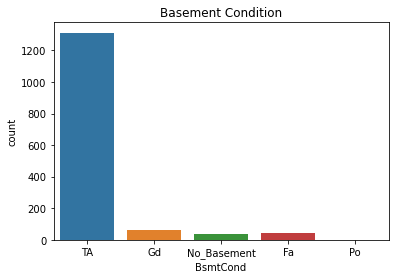

In [27]:
# Count plot on Basement count values

sns.countplot(x = 'BsmtCond', data = house_data)
plt.title('Basement Condition')

TA being 'Typical - slight dampness allowed' shows the highest reading among all the 'basement condition' states.

Text(0.5, 1.0, 'Ground Living Area vs Sale Price')

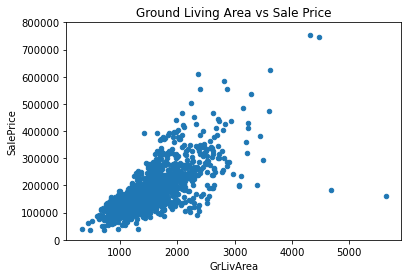

In [28]:
# Scatter plot on grade (ground) living area vs sale price

data = pd.concat([house_data['SalePrice'], house_data['GrLivArea']], axis = 1)
data.plot.scatter(x ='GrLivArea', y = 'SalePrice', ylim = (0,800000));
plt.title('Ground Living Area vs Sale Price')

The above plot fairly shows a linear trend.

Text(0.5, 1.0, 'Overall Condition')

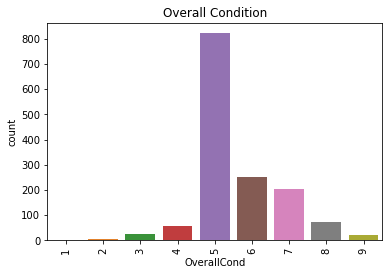

In [29]:
# Count plot on overall condition count values

sns.countplot(x = 'OverallCond', data = house_data).tick_params(axis = 'x', rotation = 90)
plt.title('Overall Condition')

5 being 'Average' shows the highest reading among all the 'overall condition' states.

Text(0.5, 1.0, 'Overall Quality vs Sale Price')

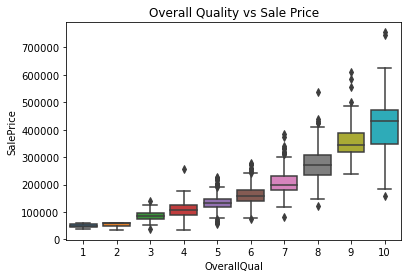

In [30]:
# Box plot on overall quality (overall material and finish of the house) vs sale price

sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = house_data)
plt.title("Overall Quality vs Sale Price")

**Insights**

* Most of the houses have Overall quality as 5, 6 and 7
* People pay more for higher quality houses

<AxesSubplot:xlabel='SalePrice'>

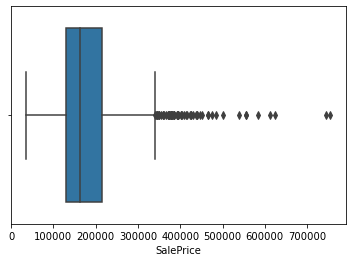

In [31]:
# Box plot to check for outliers

sns.boxplot(x = 'SalePrice', data = house_data)

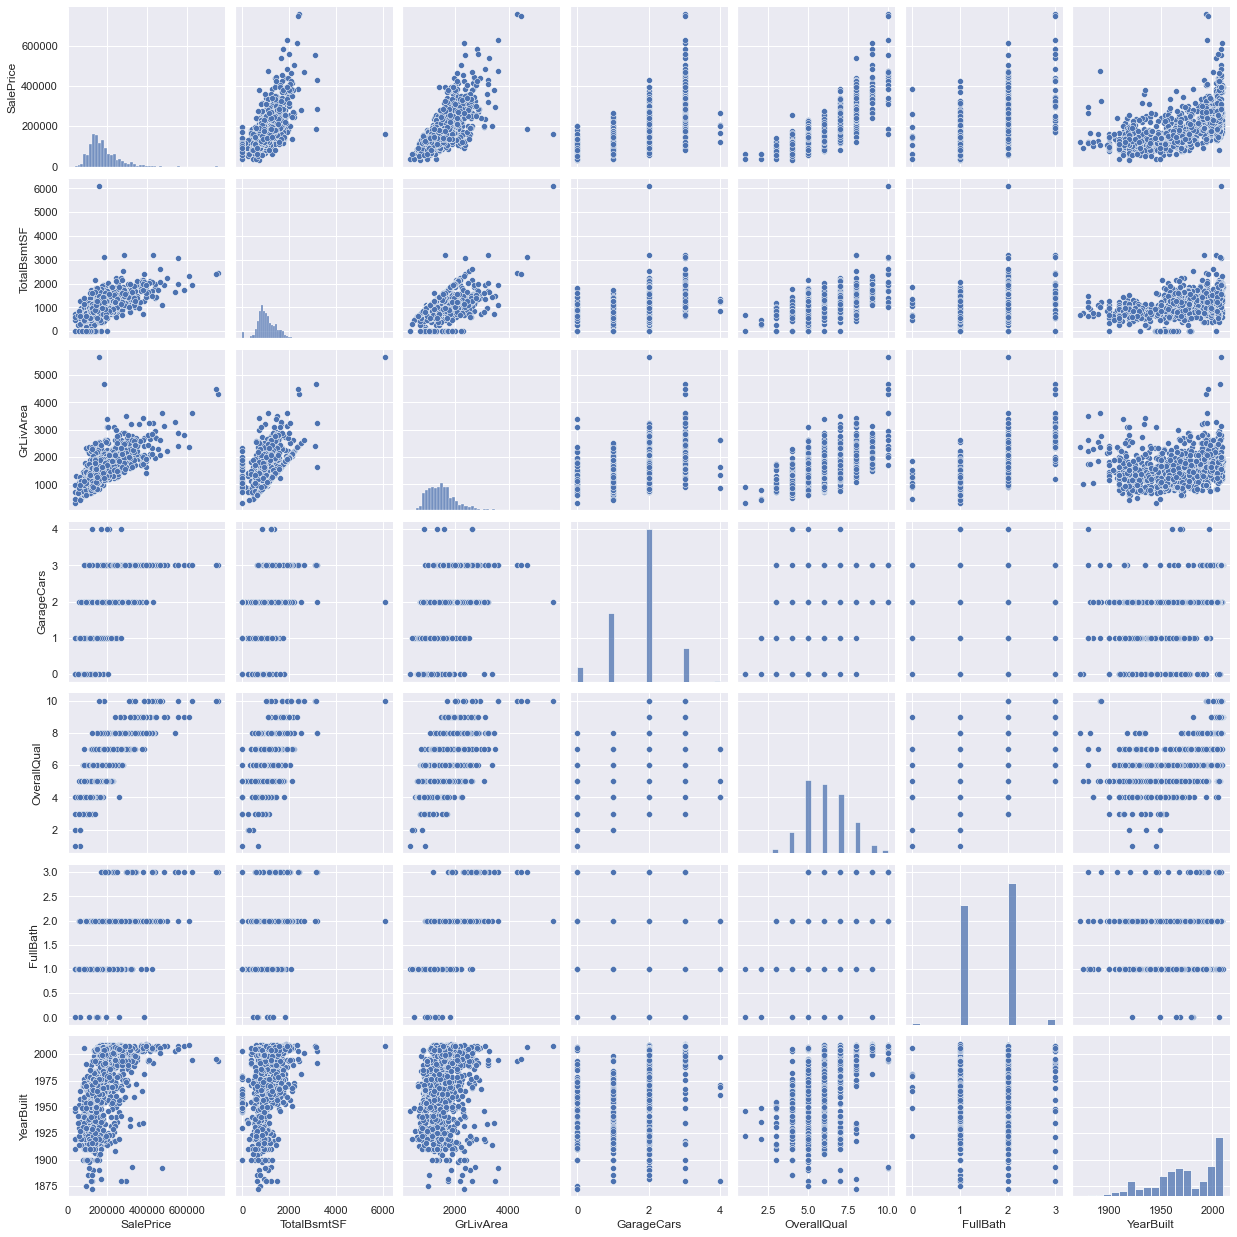

In [32]:
# Scatter plot with response variable and a few predictor variables

sns.set()
cols = ['SalePrice', 'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'OverallQual', 'FullBath', 'YearBuilt']
sns.pairplot(house_data[cols], size = 2.5)
plt.show()

<AxesSubplot:>

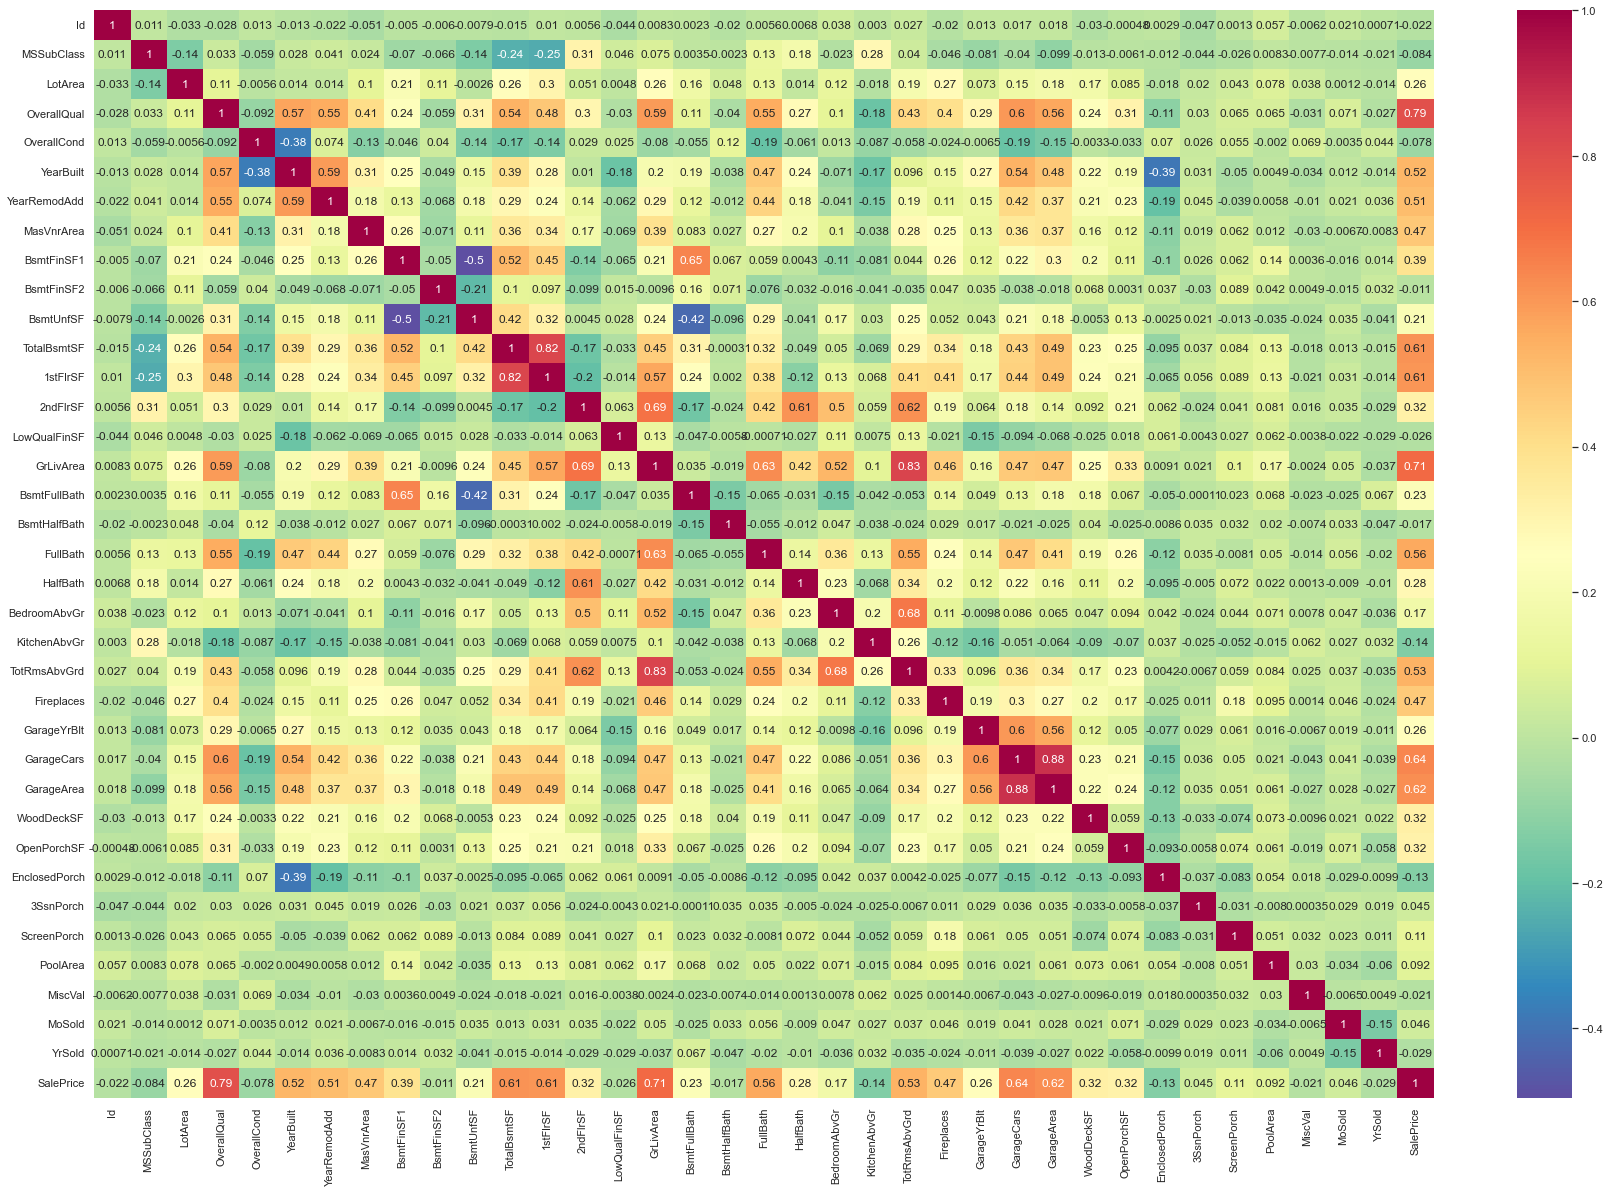

In [33]:
# Heat map to check the correlation matrix

plt.figure (figsize = (30,20))
house_data_corr = house_data.corr()
sns.heatmap(house_data_corr, cmap = "Spectral_r", annot = True)

**Insights:**

The heatmap reveals some interesting facts.

Corelation of independent variables with price.

Overall material quality and finish, ground living area, garage size (in terms of car capacity), garage area (in sq feet), total basement area (sq feet), first floor area (sq feet), number of bathrooms, total rooms, and year built are all substantially (positively) related to price. Surprisingly, these are some of the considerations individuals consider when buying a home.
The enclosed porch area (sq feet), type of dwelling, overall condition of the house and a few other criteria all have a negative correlation with price.
Independent variables have a strong correlation.

Corelation amongst independent variables

Some independent variables, such as 1st floor area, basement area, garage area (in terms of sq feet and cars), total rooms and living area, and so on, show a high degree of correlation.  Some independent variables, such as unfinished and finished basement areas, basement full bathrooms, and unfinished basement area, have a negative correlation.
Multi colinearity can pose problems when developing a model for this data set, so caution is advised.

### Deriving new variables

In [34]:
# Viewing the numeric variables in the dataset

numeric_data = house_data.select_dtypes (include = ['float64','int64'])
numeric_data.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [35]:
# Converting a binary variable into numeric datatype & mapping it to 0 and 1

house_data['CentralAir'] = house_data['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
house_data['Street'] = house_data['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )
house_data['PavedDrive'] = house_data['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)                                                  

In [36]:
# Viewing 5 enteries of the dataset

cat_values = house_data.select_dtypes(include = ['object'])
cat_values.head()

,MSZoning,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,No_Alley_Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,No_Fireplace,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
1,RL,No_Alley_Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
2,RL,No_Alley_Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
3,RL,No_Alley_Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Detchd,Unf,TA,TA,No_Pool,No_Fence,None,WD,Abnorml
4,RL,No_Alley_Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal


In [37]:
# Convert into dummy variables

dummies = pd.get_dummies(cat_values, drop_first = True)
dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No_Alley_Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [38]:
# Droping the column: 'Id' 

df = house_data.drop(['Id'],axis = 1)

In [39]:
# Droping the original categorical column to the dataset

df = df.drop(list(cat_values.columns), axis = 1)

In [40]:
# Adding the dummy categorical column to the original dataset

df = pd.concat([df, dummies], axis = 1)

In [41]:
# Shape of the dataset (number of rows and columns)

df.shape

(1460, 259)

In [42]:
# Train & test split

df_train, df_test = train_test_split(df, train_size=0.7,test_size = 0.3, random_state = 100)

In [43]:
# Dropping the response variable from the train and test dataset

y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice", 1)

y_test = np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice", 1)

In [44]:
# Let's view the varibables now

num_values = X_train.select_dtypes(include = ['int64','float64']).columns
num_values

Index(['MSSubClass', 'LotArea', 'Street', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [45]:
# Scaling the data using Standard Scaler 

scaler = StandardScaler()
X_train[num_values] = scaler.fit_transform(X_train[num_values])
X_test[num_values] = scaler.transform(X_test[num_values])

## Step 4: Recursive Feature Elimination (RFE)

In [46]:
# Building a regression model by instantiating a Linear Regression class object

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [47]:
# Calculating RFE for 20 variables

rfe = RFE(reg, 20)
rfe = rfe.fit(X_train, y_train)

In [48]:
# Variables selected by RFE

col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Condition2_PosN', 'RoofStyle_Shed', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'ExterCond_Fa', 'Heating_GasA', 'Heating_GasW', 'Heating_Wall',
       'Electrical_FuseP', 'Functional_Sev', 'GarageQual_Po', 'PoolQC_Gd',
       'SaleType_Con'],
      dtype='object')

In [49]:
# Add a constant

X_train_new = X_train[col]
X_train_new = sm.add_constant(X_train_new)

In [50]:
# Create the 1st model

lr = sm.OLS(y_train, X_train_new)

In [51]:
# Fitting the model

lr_model = lr.fit()

In [52]:
# Summary to understand the model parameters 

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     143.8
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          2.50e-277
Time:                        14:22:42   Log-Likelihood:                 187.50
No. Observations:                1021   AIC:                            -333.0
Df Residuals:                    1000   BIC:                            -229.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.0537      0.118     93.842      0.000      10.823      11.285
OverallQual             0.3010      0.007     44.085      0.000       0.288       0.314
MSZoning_FV             0.4376      0.085      5.163      0.000       0.271       0.604
MSZoning_RH             0.3965      0.096      4.121      0.000       0.208       0.585
MSZoning_RL             0.5103      0.079      6.494      0.000       0.356       0.664
MSZoning_RM             0.2756      0.079      3.470      0.001       0.120       0.432
Condition2_PosN        -0.7850      0.204     -3.840      0.000      -1.186      -0.384
RoofStyle_Shed          0.2604      0.144      1.808      0.071      -0.022       0.543
RoofMatl_Tar&Grv        0.2418      0.097      2.502      0.012       0.052       0.431
RoofMatl_WdShngl        0.2617      0.102      2.556      0.011       0.061       0.463
Exterior1st_AsphShn    -0.3231      0.204     -1.586      0.113      -0.723       0.077
Exterior1st_BrkComm    -0.5682      0.157     -3.626      0.000      -0.876      -0.261
ExterCond_Fa           -0.1447      0.051     -2.857      0.004      -0.244      -0.045
Heating_GasA            0.5067      0.088      5.752      0.000       0.334       0.680
Heating_GasW            0.6209      0.105      5.908      0.000       0.415       0.827
Heating_Wall            0.4232      0.135      3.141      0.002       0.159       0.688
Electrical_FuseP       -0.2822      0.131     -2.160      0.031      -0.539      -0.026
Functional_Sev         -0.5254      0.225     -2.334      0.020      -0.967      -0.084
GarageQual_Po           0.2931      0.168      1.748      0.081      -0.036       0.622
PoolQC_Gd              -0.9289      0.204     -4.543      0.000      -1.330      -0.528
SaleType_Con            0.1464      0.145      1.011      0.312      -0.138       0.430
==============================================================================
Omnibus:                        9.200   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               11.710
Skew:                           0.108   Prob(JB):                      0.00287
Kurtosis:                       3.478   Cond. No.                         59.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above table we can see that the R-squared value is not good enough to consider this as our final model. Hence, we will proceed with Ridge and Lasso regression.

## Step 5: Ridge and Lasso Regression

### Ridge Regression

In [53]:
# Considering the below values for alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

In [54]:
# Creating an object of class Ridge

ridge = Ridge()

In [55]:
# Perform cross-validation

folds = 5
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring = 'neg_mean_absolute_error', cv = folds, return_train_score = True, verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [56]:
# Check for the best parameters and scores

print (model_cv.best_params_)
print (model_cv.best_score_)

{'alpha': 0.1}
-0.08888098944882783


In [57]:
# Viewing the model results

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha'] <= 100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017655,0.001777,0.008098,0.000907,0.0001,{'alpha': 0.0001},-0.091274,-0.095970,-0.095115,-0.087270,...,-0.090442,0.004999,14,-0.054605,-0.055116,-0.055868,-0.056766,-0.055703,-0.055612,0.000730
1,0.019059,0.001681,0.007590,0.001032,0.001,{'alpha': 0.001},-0.090983,-0.095920,-0.095063,-0.087130,...,-0.090319,0.005012,13,-0.054636,-0.055125,-0.055882,-0.056849,-0.055737,-0.055646,0.000748
2,0.019359,0.001202,0.007969,0.000013,0.01,{'alpha': 0.01},-0.090336,-0.095578,-0.094677,-0.086390,...,-0.089882,0.004969,8,-0.054827,-0.055242,-0.056021,-0.057084,-0.055876,-0.055810,0.000770
3,0.017554,0.001621,0.007779,0.000977,0.05,{'alpha': 0.05},-0.089986,-0.094656,-0.094106,-0.084322,...,-0.089209,0.004837,4,-0.055804,-0.055717,-0.056608,-0.057731,-0.056751,-0.056522,0.000733
4,0.019349,0.001229,0.008424,0.000554,0.1,{'alpha': 0.1},-0.089849,-0.094134,-0.094175,-0.082815,...,-0.088881,0.004961,1,-0.057018,-0.056194,-0.057298,-0.058636,-0.057873,-0.057404,0.000820
5,0.019150,0.001596,0.007790,0.000979,0.2,{'alpha': 0.2},-0.090371,-0.093811,-0.094777,-0.081243,...,-0.088886,0.005316,2,-0.059147,-0.056934,-0.058598,-0.060613,-0.059764,-0.059011,0.001236
6,0.017936,0.001777,0.006582,0.001197,0.3,{'alpha': 0.3},-0.090967,-0.093766,-0.095287,-0.080172,...,-0.089004,0.005682,3,-0.060826,-0.057553,-0.059779,-0.062291,-0.061428,-0.060376,0.001631
7,0.017745,0.001156,0.007181,0.000977,0.4,{'alpha': 0.4},-0.091500,-0.093849,-0.095743,-0.079512,...,-0.089267,0.005926,5,-0.062214,-0.058068,-0.060730,-0.063693,-0.062831,-0.061507,0.001973
8,0.017663,0.001330,0.007088,0.001361,0.5,{'alpha': 0.5},-0.091857,-0.093888,-0.096105,-0.079479,...,-0.089534,0.005980,6,-0.063437,-0.058535,-0.061536,-0.064837,-0.063983,-0.062466,0.002244
9,0.019749,0.000399,0.007977,0.000002,0.6,{'alpha': 0.6},-0.092051,-0.093944,-0.096400,-0.079521,...,-0.089741,0.006008,7,-0.064470,-0.058963,-0.062212,-0.065800,-0.064951,-0.063279,0.002463


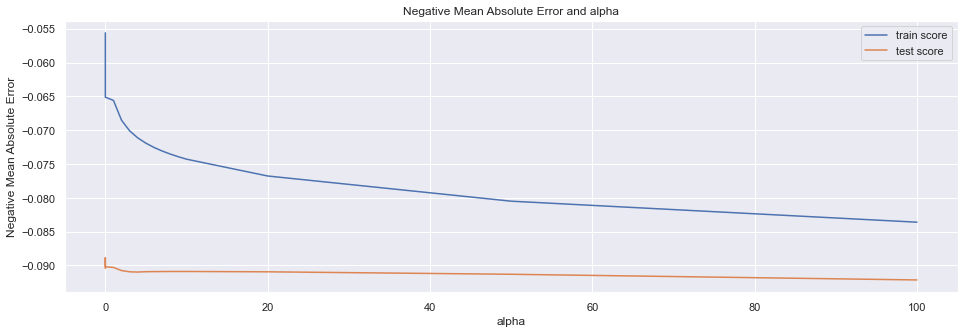

In [58]:
# Plotting alpha against the negative mean absolute error

cv_results ['param_alpha'] = cv_results ['param_alpha'].astype ('int32')
plt.figure (figsize = (16, 5))
plt.plot (cv_results ['param_alpha'], cv_results ['mean_train_score'])
plt.plot (cv_results ['param_alpha'], cv_results ['mean_test_score'])
plt.xlabel ('alpha')
plt.ylabel ('Negative Mean Absolute Error')
plt.title ("Negative Mean Absolute Error and alpha")
plt.legend (['train score', 'test score'], loc = 'upper right')
plt.show()

#### Ridge Model 1

In [59]:
# Checking with alpha = 10 

alpha = 10
ridge = Ridge(alpha = alpha)
ridge_model = ridge.fit(X_train, y_train)
ridge.coef_

array([-2.13588683e-02,  1.89916299e-02,  7.32788104e-03,  7.96272008e-02,
        4.07795269e-02,  3.72507374e-02,  2.05612877e-02, -2.78758819e-03,
       -1.30338491e-03,  7.00573179e-03,  4.35785540e-03,  5.54550229e-03,
        1.48199078e-02,  3.71802799e-02,  4.20642007e-02,  8.38654798e-04,
        6.23082078e-02,  2.96128365e-02,  2.70973194e-03,  1.87339625e-02,
        1.07448695e-02,  1.20910988e-02, -1.36071727e-02,  1.55763919e-02,
        2.26747431e-03, -1.68263637e-07,  4.02874958e-02,  4.26597599e-03,
        1.44157825e-03,  1.36107502e-02, -2.04563445e-03,  8.78571434e-03,
        7.21095211e-03,  1.06190229e-02, -1.48411310e-02, -1.44232684e-06,
       -1.10809910e-03, -6.42496907e-03,  4.82665535e-02,  3.90986114e-02,
        6.20215882e-02,  1.56874684e-02,  2.13182526e-03,  2.59755306e-02,
        2.43135413e-02, -5.00428493e-02,  4.82153805e-03,  3.82124377e-02,
        3.57786634e-02,  4.68949873e-02, -1.30779083e-02,  3.69460173e-02,
       -3.54873205e-02, -

In [60]:
# Declaring a few variables to detect the maximum coefficient and important column

ridge_max_col = ""
ridge_max_coef = 0

# Calculating the maximum coefficient and most important column for the ridge model

for (coef, column) in zip(ridge_model.coef_, X_train.columns):
    if coef > ridge_max_coef:
        ridge_max_coef = coef
        ridge_max_col = column
        
print("Ridge maximum column = ", ridge_max_col)
print("Ridge maximum coefficient = ", ridge_max_coef)
print()

Ridge maximum column =  Neighborhood_Crawfor
Ridge maximum coefficient =  0.1035818724317891



In [61]:
# Calculating the R-squared value on train dataset

y_train_pred = ridge.predict(X_train)
print ("R-squared value on train dataset:", r2_score(y_true = y_train, y_pred = y_train_pred))

R-squared value on train dataset: 0.9220052574594756


In [62]:
# Calculating the R-squared value on test dataset

y_test_pred = ridge.predict(X_test)
print ("R-squared value on test dataset:", r2_score(y_true = y_test, y_pred = y_test_pred))

R-squared value on test dataset: 0.8855287818493235


In [63]:
# Calculating the RMSE value

print("RMSE value:", mean_squared_error(y_test, y_test_pred))

RMSE value: 0.018835107573615575


With alpha = 10, below are the values obtained:
    
* R-squared value on train dataset - 0.92
* R-squared value on test dataset - 0.88
* RMSE value - 0.018

#### Ridge model 2

In [64]:
# Checking with alpha = 0.001

ridge = Ridge (alpha  = 0.001)
ridge.fit (X_train, y_train)

Ridge(alpha=0.001)

In [65]:
# Calculating the R-squared value on train dataset

y_train_pred = ridge.predict(X_train)
print ("R-squared value on train dataset:", r2_score(y_true = y_train, y_pred = y_train_pred))

R-squared value on train dataset: 0.9588831606134212


In [66]:
# Calculating the R-squared value on test dataset

y_test_pred = ridge.predict(X_test)
print ("R-squared value on test dataset:", r2_score(y_true = y_test, y_pred = y_test_pred))

R-squared value on test dataset: 0.7055748800456506


In [67]:
# Calculating the RMSE value

print("RMSE value", mean_squared_error(y_test, y_test_pred))

RMSE value 0.048444743546062


With alpha = 0.001, below are the values obtained:

* R-squared value on train dataset - 0.95
* R-squared value on test dataset - 0.70
* RMSE value - 0.048

#### Ridge Model 3

In [68]:
# Calculating the R-squared value with alpha = 0.1 on test and train data

ridge = Ridge(alpha = 0.1)
ridge.fit (X_train, y_train)

Ridge(alpha=0.1)

In [69]:
# Calculating the R-squared value on train dataset

y_pred_train = ridge.predict (X_train)
print ("R-squared value on train dataset:", r2_score (y_train, y_pred_train))

R-squared value on train dataset: 0.9575101480652918


In [70]:
# Calculating the R-squared value on test dataset

y_pred_test = ridge.predict(X_test)
print("R-squared value on test dataset:", r2_score(y_test,y_pred_test))

R-squared value on test dataset: 0.7491779353883943


In [71]:
# Calculating the RMSE value

print("RMSE value:", mean_squared_error(y_test, y_test_pred))

RMSE value: 0.048444743546062


With alpha = 0.1, below are the values obtained:

* R-squared value on train dataset - 0.95
* R-squared value on test dataset - 0.74
* RMSE value - 0.048

**Compared to the 3 ridge models, we can say that alpha = 10 is giving us optimum results**

**Train set**

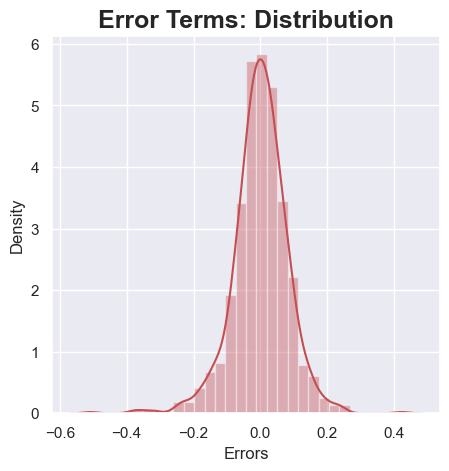

In [72]:
# Checking for error terms on train set: normally distributed along 0

sns.set_style('dark')
plt.figure(figsize = (5,5), dpi = 100)

# Residuals
res = (y_train - y_pred_train)     
sns.distplot(res , bins = 30, color = 'r')
plt.title('Error Terms: Distribution', fontweight = 'bold', fontsize = 18)               
plt.xlabel('Errors', fontsize = 12) 
plt.grid (True)
plt.show()

Error terms seem to be normally distributed with mean 0, so the assumption holds good.

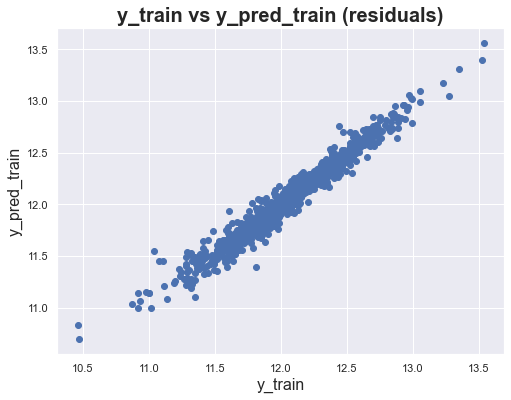

In [73]:
# Understanding the residuals: plotting y_train and y_train_pred 

sns.set_style ('dark')
plt.figure (figsize = (8,6))
plt.scatter (y_train, y_pred_train)
plt.title ('y_train vs y_pred_train (residuals)', fontweight = 'bold', fontsize = 20)           
plt.xlabel ('y_train', fontsize = 16)              
plt.ylabel ('y_pred_train', fontsize = 16) 
plt.grid (True)
plt.show ()

**Test set**

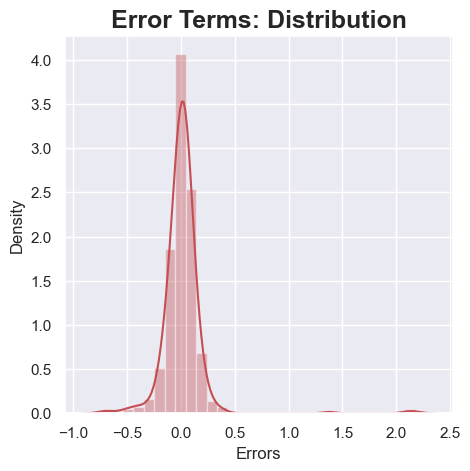

In [74]:
# Checking for error terms on test set: normally distributed along 0

sns.set_style('dark')
plt.figure(figsize = (5,5), dpi = 100)

# Residuals
res = (y_test - y_pred_test)     
sns.distplot(res , bins = 30, color = 'r')
plt.title('Error Terms: Distribution', fontweight = 'bold', fontsize = 18)               
plt.xlabel('Errors', fontsize = 12) 
plt.grid(True)
plt.show()

Error terms seem to be normally distributed with mean 0, so the assumption holds good.

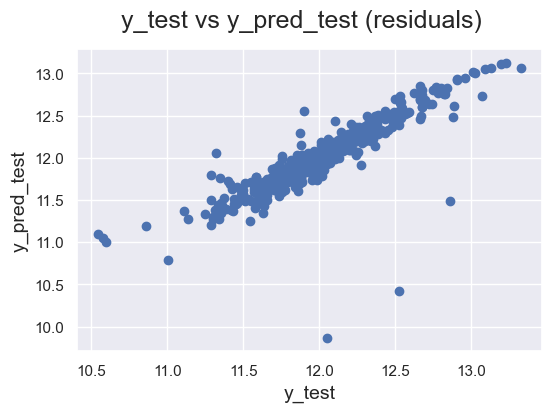

In [75]:
# Understanding the residuals: plotting y_test and y_test_pred 

sns.set_style('dark')
fig = plt.figure(figsize = (6,4), dpi = 100)
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred_test (residuals)', fontsize = 18)             
plt.xlabel('y_test', fontsize = 14)                       
plt.ylabel('y_pred_test', fontsize = 14)  
plt.grid (True)
plt.show()

### Lasso Regression

In [76]:
# Considering the below values for alpha

params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}

In [77]:
# Creating an object of class Lasso

lasso = Lasso()

In [78]:
# Perform cross-validation

lasso_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring = 'neg_mean_absolute_error', cv = folds, return_train_score = True, verbose = 1)            
lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [79]:
# Check for the best parameters and scores

print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.0001}
-0.0833575790520841


In [80]:
# Viewing the model results

cv_results_l = pd.DataFrame(lasso_cv.cv_results_)

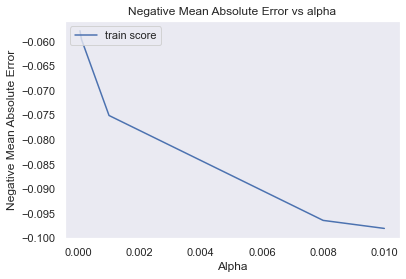

In [81]:
# Plotting alpha against the negative mean absolute error

cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error vs alpha")
plt.legend(['train score', 'test score'], loc = 'upper left')
plt.show()

#### Lasso model 1

In [82]:
# After trial and error, checking the results with alpha = 0.001

alpha = 0.001
lasso = Lasso(alpha = alpha)
lasso_model = lasso.fit(X_train, y_train) 
lasso.coef_

array([-1.58986880e-02,  1.77328839e-02,  7.45493006e-03,  8.92609173e-02,
        4.49733107e-02,  5.24420084e-02,  2.11904683e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.73403190e-02,
        1.31726648e-02,  5.57365739e-04,  0.00000000e+00, -2.81043595e-03,
        1.18031173e-01,  3.11416982e-02,  2.03120136e-03,  1.33933861e-02,
        8.44317064e-03,  5.66696196e-03, -1.15603901e-02,  1.31358396e-02,
        6.75562031e-03, -1.47256115e-06,  3.89265887e-02,  5.91793364e-03,
        1.83237079e-03,  1.28752008e-02, -0.00000000e+00,  6.00119886e-03,
        5.33435901e-03,  1.05851336e-02, -1.35222907e-02, -9.35029429e-04,
       -1.36117711e-03, -5.93902219e-03,  0.00000000e+00,  0.00000000e+00,
        4.66696364e-02, -7.07128010e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.49559431e-03, -0.00000000e+00,  2.89713629e-02,
       -0.00000000e+00, -

In [83]:
# Declaring a few variables to detect the maximum coefficient and important column 

lasso_max_col = ""
lasso_max_coef = 0

# Calculating the maximum coefficient and most important column for the lasso model

for (coef, column) in zip(lasso_model.coef_, X_train.columns):
    if coef > lasso_max_coef:
        lasso_max_coef = coef
        lasso_max_col = column
        
print("Lasso maximum column = ", lasso_max_col)
print("Lasso maximum coefficient = ", lasso_max_coef)
print()

Lasso maximum column =  GrLivArea
Lasso maximum coefficient =  0.11803117274292615



In [84]:
# Calculating the R-squared value on train dataset

y_train_pred = lasso.predict(X_train)
print("R-squared value on train dataset:", r2_score(y_true = y_train, y_pred = y_train_pred))

R-squared value on train dataset: 0.9174442574972889


In [85]:
# Calculating the R-squared on test dataset

y_test_pred = lasso.predict(X_test)
print("R-squared on test dataset:", r2_score(y_true = y_test, y_pred = y_test_pred))

R-squared on test dataset: 0.855123192817482


In [86]:
# Calculating the RMSE value

print("RMSE value:", mean_squared_error(y_test, y_test_pred))

RMSE value: 0.023838046736017564


With alpha = 0.001, below are the values obtained:

* R-squared value on train dataset - 0.91
* R-squared value on test dataset - 0.85
* RMSE value - 0.023

#### Lasso Model 2

In [87]:
# Calculating the R-squared value with alpha = 0.001 on test and train data

lasso = Lasso(alpha = 0.0001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [88]:
# Calculating the R-squared value on train dataset

y_train_pred = lasso.predict(X_train)
print("R-squared value on train dataset:", r2_score(y_true = y_train, y_pred = y_train_pred))

R-squared value on train dataset: 0.9548260977139877


In [89]:
# Calculating the R-squared on test dataset

y_test_pred = lasso.predict(X_test)
print("R-squared on test dataset:", r2_score(y_true = y_test, y_pred = y_test_pred))

R-squared on test dataset: 0.6676798450940384


In [90]:
# Calculating the RMSE value

print("RMSE value:", mean_squared_error(y_test, y_test_pred))

RMSE value: 0.05467999701283329


With alpha = 0.001, below are the values obtained:

* R-squared value on train dataset - 0.95
* R-squared value on test dataset - 0.66
* RMSE value - 0.054

Results say that the model is **overfitting**

#### Lasso model 3

In [91]:
# Calculating the R-squared value with alpha = 0.001 on test and train data

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train,y_train)

Lasso(alpha=0.01)

In [92]:
# Calculating the R-squared value on train dataset

y_train_pred = lasso.predict(X_train)
print("R-squared value on train dataset:", r2_score(y_true = y_train, y_pred = y_train_pred))

R-squared value on train dataset: 0.8605154960829355


In [93]:
# Calculating the R-squared on test dataset

y_test_pred = lasso.predict(X_test)
print("R-squared value on test dataset:", r2_score(y_true = y_test, y_pred = y_test_pred))

R-squared value on test dataset: 0.8610933753881044


In [94]:
# Calculating the RMSE value

print("RMSE value:", mean_squared_error(y_test, y_test_pred))

RMSE value: 0.022855712200153862


With alpha = 0.001, below are the values obtained:

* R-squared value on train dataset - 0.86
* R-squared value on test dataset - 0.86
* RMSE value - 0.022

**Compared to the 3 lasso models, we can say that alpha = 0.001 is giving us optimum results**

**Train set**

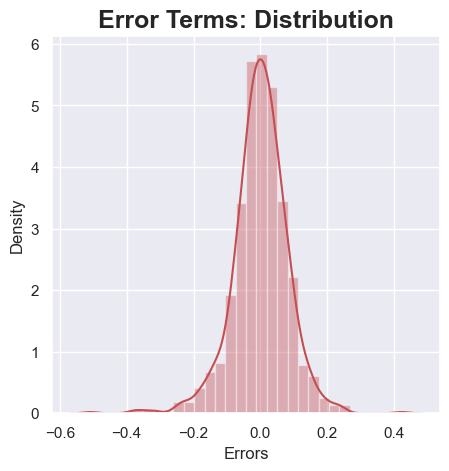

In [95]:
# Checking for error terms on train set: normally distributed along 0

sns.set_style('dark')
plt.figure(figsize = (5,5), dpi = 100)

# Residuals
res = (y_train - y_pred_train)     
sns.distplot(res , bins = 30, color = 'r')
plt.title('Error Terms: Distribution', fontweight = 'bold', fontsize = 18)               
plt.xlabel('Errors', fontsize = 12) 
plt.grid(True)
plt.show()

Error terms seem to be normally distributed with mean 0, so the assumption holds good.

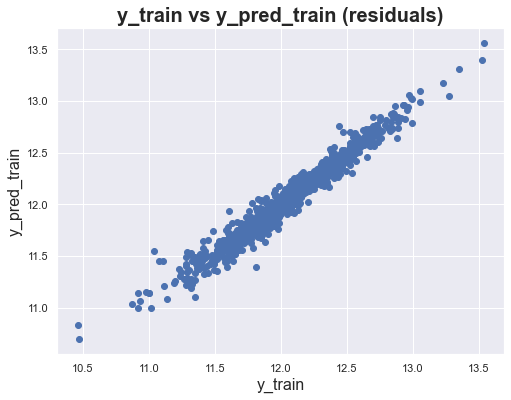

In [96]:
# Understanding the residuals: plotting y_train and y_train_pred 

sns.set_style('dark')
plt.figure(figsize = (8,6))
plt.scatter(y_train, y_pred_train)
plt.title('y_train vs y_pred_train (residuals)', fontweight = 'bold', fontsize = 20)           
plt.xlabel('y_train', fontsize = 16)              
plt.ylabel('y_pred_train', fontsize = 16) 
plt.grid(True)
plt.show()

**Test set**

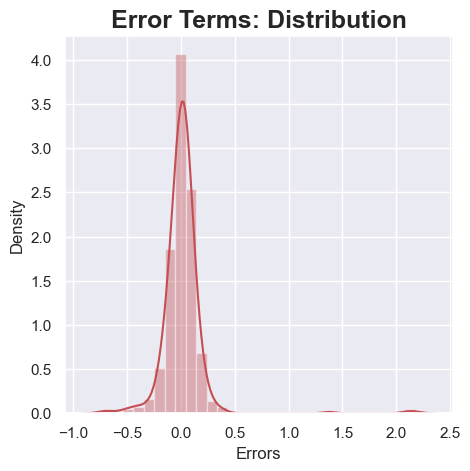

In [97]:
# Checking for error terms on test set: normally distributed along 0

sns.set_style('dark')
plt.figure(figsize = (5,5), dpi = 100)

# Residuals
res = (y_test - y_pred_test)     
sns.distplot(res , bins = 30, color='r')
plt.title('Error Terms: Distribution', fontweight = 'bold', fontsize = 18)               
plt.xlabel('Errors', fontsize = 12) 
plt.grid(True)
plt.show()

Error terms seem to be normally distributed with mean 0, so the assumption holds good.

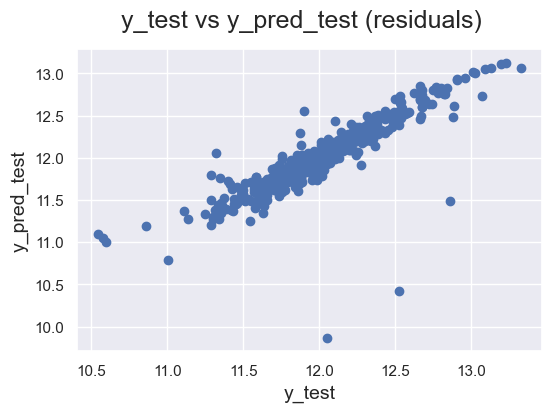

In [98]:
# Understanding the residuals: plotting y_test and y_test_pred 

sns.set_style('dark')
fig = plt.figure(figsize = (6,4), dpi = 100)
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred_test (residuals)', fontsize = 18)             
plt.xlabel('y_test', fontsize = 14)                       
plt.ylabel('y_pred_test', fontsize = 14)  
plt.grid(True)
plt.show()

### Conclusion

Below are the final alpha values for both the models:

* **Ridge**: alpha = 10
* **Lasso**: alpha = 0.001

Among the 2 models (Ridge and Lasso) considering the Mean Square Error values and R-squared values, we can conclude that the regression performed using the Ridge model has better results than Lasso.

## Subjective questions

### Question 1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

#### Doubling the alpha values for both the models:

* Ridge: alpha = 10 * 2 = 20
* Lasso: alpha = 0.001 * 2 = 0.002

#### Ridge model with new alpha = 20

In [99]:
# Calculating the R-squared value with alpha = 20 on test and train data

ridge_double = 20

ridge_double = Ridge(alpha = ridge_double)
ridge_double_model = ridge_double.fit(X_train, y_train)

In [100]:
# Calculating the R-squared value on train dataset

y_pred_train = ridge_double.predict(X_train)
print("R-squared value on train dataset:", r2_score(y_train, y_pred_train))

R-squared value on train dataset: 0.9153775983489105


In [101]:
# Calculating the R-squared value on test dataset

y_pred_test = ridge.predict(X_test)
print("R-squared value on test dataset:", r2_score(y_test, y_pred_test))

R-squared value on test dataset: 0.7491779353883943


In [102]:
# Calculating the RMSE value

print("RMSE value:", mean_squared_error(y_test, y_test_pred))

RMSE value: 0.022855712200153862


With alpha = 20, below are the values obtained:

* R-squared value on train dataset - 0.91
* R-squared value on test dataset - 0.74
* RMSE value - 0.022

In [103]:
# Declaring a few variables to detect the maximum coefficient and important column (for doubled alpha value)

ridge_double_max_col = ""
ridge_double_max_coef = 0

# Calculating the maximum coefficient and most important column for the ridge model

for (coef, column) in zip(ridge_double_model.coef_, X_train.columns):
    if coef > ridge_double_max_coef:
        ridge_double_max_coef = coef
        ridge_double_max_col = column
        
print("Ridge_double max col = ", ridge_double_max_col)
print("Ridge_double max coef = ", ridge_double_max_coef)
print()

Ridge_double max col =  OverallQual
Ridge_double max coef =  0.08323328821939213



#### Lasso model with new alpha = 0.002

In [104]:
# Calculating the R-squared value with alpha = 0.002 on test and train data

lasso_double = 0.002
lasso = Lasso(alpha = lasso_double)
lasso_double_model = lasso.fit(X_train, y_train)

In [105]:
 lasso.coef_ 

array([-2.04091862e-02,  1.77044963e-02,  7.97268667e-03,  1.02857047e-01,
        4.28259268e-02,  4.96927054e-02,  2.18221919e-02,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  5.26722494e-04,  2.11899377e-02,
        1.43245448e-02,  6.38832648e-03,  0.00000000e+00, -0.00000000e+00,
        1.01970573e-01,  3.31213292e-02,  2.06148391e-03,  1.50044590e-02,
        7.32600048e-03,  5.63298360e-03, -8.38196032e-03,  1.34343900e-02,
        1.22313719e-02, -4.32331092e-06,  5.02990264e-02,  1.15966839e-04,
        2.27179471e-03,  1.28115674e-02, -0.00000000e+00,  4.22035612e-03,
        5.17462297e-03,  1.07827476e-02, -2.12086058e-02, -0.00000000e+00,
       -0.00000000e+00, -6.00145611e-03,  0.00000000e+00,  0.00000000e+00,
        2.88737606e-02, -2.78950709e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  1.43043864e-02,
       -0.00000000e+00, -

In [106]:
# Declaring a few variables to detect the maximum coefficient and important column (for doubled alpha value)

lasso_double_max_col = ""
lasso_double_max_coef = 0

# Calculating the maximum coefficient and most important column for the lasso model

for (coef,column) in zip(lasso_double_model.coef_, X_train.columns):
    if coef > lasso_double_max_coef:
        lasso_double_max_coef = coef
        lasso_double_max_col = column
        
print("Lasso_double maximum column = ", lasso_double_max_col)
print("Lasso_double maximum coefficient = ", lasso_double_max_coef)

Lasso_double maximum column =  OverallQual
Lasso_double maximum coefficient =  0.10285704712399321


In [107]:
# Calculating the R-squared value on train dataset

y_train_pred = lasso_double_model.predict(X_train)
print("R-squared value on train dataset:", r2_score(y_true = y_train, y_pred = y_train_pred))

R-squared value on train dataset: 0.8921940497658923


In [108]:
# Calculating the R-squared on test dataset

y_test_pred = lasso_double_model.predict(X_test)
print("R-squared on test dataset:", r2_score(y_true = y_test, y_pred = y_test_pred))

R-squared on test dataset: 0.8774018105216189


In [109]:
# Calculating the RMSE value

print("RMSE value:", mean_squared_error(y_test, y_test_pred))

RMSE value: 0.020172320382895886


With alpha = 0.002, below are the values obtained:

* R-squared value on train dataset - 0.89
* R-squared value on test dataset - 0.87
* RMSE value - 0.020

### Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [110]:
# Determining the top 5 predictors now

lasso_max_coef_list = []

for (coef,column) in zip(lasso_model.coef_, X_train.columns):
    if coef > lasso_max_coef:
        lasso_max_coef = coef
        lasso_max_col = column
    lasso_max_coef_list.append(coef)
lasso_max_coef_list.sort()

In [111]:
# Viewing the coefficient value list

print(lasso_max_coef_list)

[-0.7284529339910154, -0.29008418678975323, -0.05447677837715708, -0.05246957413671016, -0.032141507047031434, -0.029085461244099584, -0.028384108553464512, -0.01974027425250471, -0.017353925679354346, -0.01589868800251835, -0.013522290714331893, -0.013165385312053397, -0.012497645068825046, -0.01210054636932054, -0.011560390056634475, -0.010764412066946139, -0.008403256044089908, -0.007494988795517516, -0.0070712801016474544, -0.005939022188590916, -0.0052439520243854594, -0.0031493192886233898, -0.003073599278217324, -0.002810435945241905, -0.0024430984870905626, -0.0013611771059673968, -0.0012247534375727739, -0.0009350294289015914, -1.472561147502698e-06, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0

In [112]:
# Listing out the coefficients and their values

for (coef,column) in zip(lasso_model.coef_, X_train.columns):
    print("{} {}".format(column,coef))

MSSubClass -0.01589868800251835
LotArea 0.017732883862382153
Street 0.007454930056900158
OverallQual 0.08926091732618885
OverallCond 0.04497331070099033
YearBuilt 0.05244200838260375
YearRemodAdd 0.02119046832528318
MasVnrArea 0.0
BsmtFinSF1 0.0
BsmtFinSF2 0.0
BsmtUnfSF 0.0
TotalBsmtSF 0.027340319014048976
CentralAir 0.013172664832512252
1stFlrSF 0.0005573657393622035
2ndFlrSF 0.0
LowQualFinSF -0.002810435945241905
GrLivArea 0.11803117274292615
BsmtFullBath 0.03114169815536383
BsmtHalfBath 0.002031201356401184
FullBath 0.01339338613698009
HalfBath 0.008443170643314096
BedroomAbvGr 0.005666961956349407
KitchenAbvGr -0.011560390056634475
TotRmsAbvGrd 0.013135839606168407
Fireplaces 0.006755620309920227
GarageYrBlt -1.472561147502698e-06
GarageCars 0.03892658865053134
GarageArea 0.005917933643913478
PavedDrive 0.001832370787519996
WoodDeckSF 0.012875200815476502
OpenPorchSF -0.0
EnclosedPorch 0.006001198862058534
3SsnPorch 0.005334359006051333
ScreenPorch 0.010585133556341813
PoolArea -0.

From the above output, below are the top 5 predictors:

* GrLivArea 
* Neighborhood_Crawfor
* Neighborhood_Somerst
* OverallQual
* Neighborhood_NridgHt

In [113]:
# Dropping the 5 variables from the training dataset

X_train_top_5_excluding = X_train.drop (['GrLivArea','Neighborhood_Crawfor','Neighborhood_Somerst','OverallQual','Neighborhood_NridgHt'], axis = 1)

# Our new Lasso model

lasso_top_5_excluding = Lasso(alpha = 0.001)   
lasso_top_5_excluding_model = lasso_top_5_excluding.fit (X_train_top_5_excluding, y_train)

In [114]:
# Determining the top 5 predictors now

lasso_max_coef_excluding_top_5_list = []

for (coef,column) in zip(lasso_top_5_excluding_model.coef_, X_train_top_5_excluding.columns):
    lasso_max_coef_excluding_top_5_list.append(coef)
    
lasso_max_coef_excluding_top_5_list.sort()
print(lasso_max_coef_excluding_top_5_list)

[-1.0042133428751654, -0.3907392128760798, -0.09582974637749965, -0.06591438342684879, -0.064605596281815, -0.03927578518606801, -0.039168511553213235, -0.03770453976718902, -0.03137054500541394, -0.030436315508179816, -0.030299372628454408, -0.02916603433742018, -0.028828443134948322, -0.02374102569049838, -0.023291483679513322, -0.021822841319992063, -0.018928996943595285, -0.016881041960661293, -0.016404295779127567, -0.014062447835125988, -0.013066824198574335, -0.012853191330447085, -0.012552476099100648, -0.0121063865510057, -0.011955356413543948, -0.011861870814476178, -0.011606063759944022, -0.011364780639209444, -0.011048286478469034, -0.01028309644437456, -0.009339923571941468, -0.006997642235794268, -0.006779300212918569, -0.0060660241912466085, -0.0010662784714975178, -0.00082789612002129, -0.00043421929542656625, -0.00042688448201970316, -0.00018216803096738794, -3.217902304337995e-07, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0

In [115]:
# Listing out the coefficients and their values

for (coef,column) in zip(lasso_top_5_excluding_model.coef_, X_train_top_5_excluding.columns):
    print("{} {}".format(column,coef))

MSSubClass -0.011048286478469034
LotArea 0.014859638945333544
Street 0.007099610895853934
OverallCond 0.05377286025931225
YearBuilt 0.06083737068210549
YearRemodAdd 0.025845683873472077
MasVnrArea 0.005375305122842869
BsmtFinSF1 0.0
BsmtFinSF2 0.0028701443157930656
BsmtUnfSF -0.0
TotalBsmtSF 0.042488941516993554
CentralAir 0.014593586824207399
1stFlrSF 0.09995027136220186
2ndFlrSF 0.11242399026637179
LowQualFinSF 0.0039265877603979525
BsmtFullBath 0.02614176539871205
BsmtHalfBath 0.00031812388312242866
FullBath 0.016512926891784855
HalfBath 0.004724328345483534
BedroomAbvGr 0.0
KitchenAbvGr -0.02374102569049838
TotRmsAbvGrd 0.021933168470864454
Fireplaces 0.01730456722242219
GarageYrBlt -3.217902304337995e-07
GarageCars 0.03899661830071428
GarageArea 0.01199550143510863
PavedDrive 0.002277903737054466
WoodDeckSF 0.010340561040033216
OpenPorchSF 0.0
EnclosedPorch 0.009903780158373116
3SsnPorch 0.005073869572192499
ScreenPorch 0.009740554016576202
PoolArea -0.011955356413543948
MiscVal -

From the above output, below are the top 5 predictors now:

* 2ndFlrSF
* 1stFlrSF
* MSZoning_FV
* Condition1_Norm
* YearBuilt